## OUTPUT FOLDER WAS A PROBLEM

In [1]:
!ls /home/data/all_3_prototype/all_eebo.mallet.text.*
!cp /home/data/all_3_prototype/all_eebo.mallet.text.TMP.*  /home/data/all_3_prototype_rebuild/
!ls -l /home/data/all_3_prototype_rebuild/all_eebo.mallet.text.TMP.index.0

/home/data/all_3_prototype/all_eebo.mallet.text.DENSE_MATRIX.json
/home/data/all_3_prototype/all_eebo.mallet.text.index
/home/data/all_3_prototype/all_eebo.mallet.text.INPUT.txt
/home/data/all_3_prototype/all_eebo.mallet.text.LABELS.json
/home/data/all_3_prototype/all_eebo.mallet.text.LDA_CORPUS
/home/data/all_3_prototype/all_eebo.mallet.text.LDA_CORPUS.index
/home/data/all_3_prototype/all_eebo.mallet.text.TMP.index.0
/home/data/all_3_prototype/all_eebo.mallet.text.TMP.index.1
/home/data/all_3_prototype/all_eebo.mallet.text.TRIMMED.INPUT.doc_topics.tsv
/home/data/all_3_prototype/all_eebo.mallet.text.TRIMMED.INPUT.mallet
/home/data/all_3_prototype/all_eebo.mallet.text.TRIMMED.INPUT.topics_keys.txt
/home/data/all_3_prototype/all_eebo.mallet.text.TRIMMED.INPUT.topic-state.gz
/home/data/all_3_prototype/all_eebo.mallet.text.TRIMMED.INPUT.txt
-rw-rw-r-- 1 spenteco spenteco 26214729 Feb  7 10:48 /home/data/all_3_prototype_rebuild/all_eebo.mallet.text.TMP.index.0


In [2]:
import sys, glob, re, codecs, json, re
from gensim import corpora, models, similarities
from gensim.test.utils import get_tmpfile
from gensim.interfaces import TransformedCorpus

OUTPUT_FOLDER = '/home/data/all_3_prototype/'
LIKENESS_DEPTH = 'text'

METADATA_FILE_NAME = 'EEBO_metadata.tsv'

LABELS_FILE_NAME = OUTPUT_FOLDER + 'all_eebo.mallet.' + LIKENESS_DEPTH + '.LABELS.json'
LDA_CORPUS_FILE_NAME = OUTPUT_FOLDER + 'all_eebo.mallet.' + LIKENESS_DEPTH + '.LDA_CORPUS'
INDEX_FILE_NAME = OUTPUT_FOLDER + 'all_eebo.mallet.' + LIKENESS_DEPTH + '.index'
TMP_FILE_NAME = OUTPUT_FOLDER + 'all_eebo.mallet.text.TMP.index'


def load_metadata():

    metadata = {}

    for line in codecs.open(METADATA_FILE_NAME, 'r', encoding='utf-8').read().split('\n'):
        if line.strip() > '' and len(line.strip().split('\t')) > 3:
            cols = line.strip().split('\t')
            metadata[cols[0] + '.xml'] = {'year': cols[1], 'author': cols[2], 'title': cols[3]}

    return metadata

def load_labels_json():

    file_name_labels = json.loads(codecs.open(LABELS_FILE_NAME, 'r', encoding='utf-8').read())

    return file_name_labels

print LDA_CORPUS_FILE_NAME
print INDEX_FILE_NAME

/home/data/all_3_prototype/all_eebo.mallet.text.LDA_CORPUS
/home/data/all_3_prototype/all_eebo.mallet.text.index


In [3]:
metadata = load_metadata()
file_name_labels = load_labels_json()

corpus_lda = corpora.MmCorpus(LDA_CORPUS_FILE_NAME)

index = similarities.Similarity.load(INDEX_FILE_NAME)
index.output_prefix = TMP_FILE_NAME

print 'Loaded!'

Loaded!


In [4]:
#print corpus_lda[0]

In [5]:
import random

NUMBER_OF_FILES_IN_SAMPLE = 1000

file_indexes_to_process = random.sample([x for x in range(0, len(corpus_lda))], NUMBER_OF_FILES_IN_SAMPLE)

print 'len(file_indexes_to_process)', len(file_indexes_to_process)

len(file_indexes_to_process) 1000


In [6]:
all_distances = []

for an, a in enumerate(file_indexes_to_process):
    
    if an % 100 == 0:
        print 'processing', an
    
    lda_for_a_file = corpus_lda[a]
    
    sims = index[lda_for_a_file]
    
    for s in sims:
        all_distances.append(s)
        
print 'len(all_distances)', len(all_distances)

processing 0


/home/spenteco/anaconda2/envs/py2/lib/python2.7/site-packages/gensim/similarities/docsim.py:518: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  result = numpy.hstack(shard_results)


processing 100
processing 200
processing 300
processing 400
processing 500
processing 600
processing 700
processing 800
processing 900
len(all_distances) 60312000


In [7]:
for a in all_distances:
    if a > 0.0:
        print a
        break

0.011021472


len(all_distances) 60312000


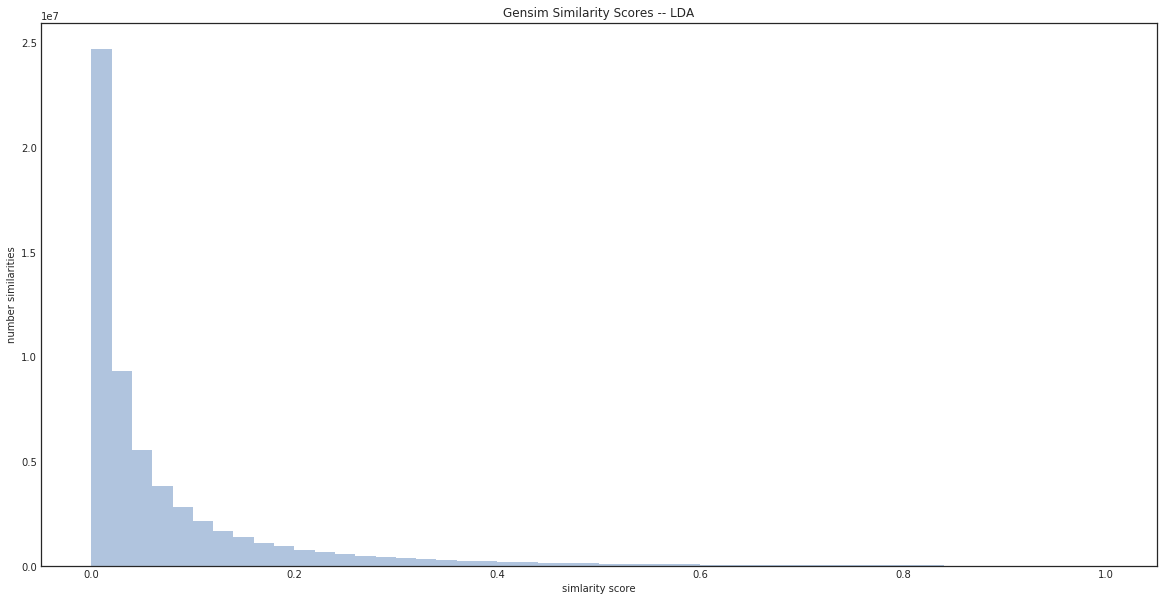

In [8]:
%matplotlib inline

import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

print 'len(all_distances)', len(all_distances)

sns.set_style("white")

plt.figure(figsize=(20, 10))
plt.title('Gensim Similarity Scores -- LDA')
plt.ylabel('number similarities')
plt.xlabel('simlarity score')

#ax = sns.distplot(all_distances)
ax = plt.hist(all_distances, bins=50, color='lightsteelblue')

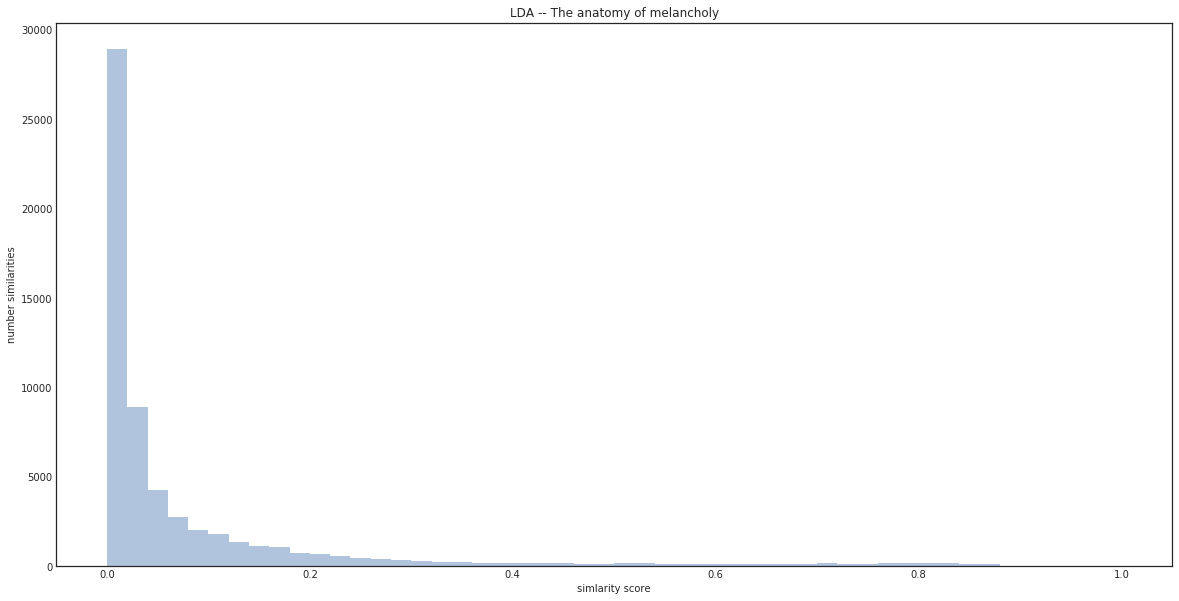

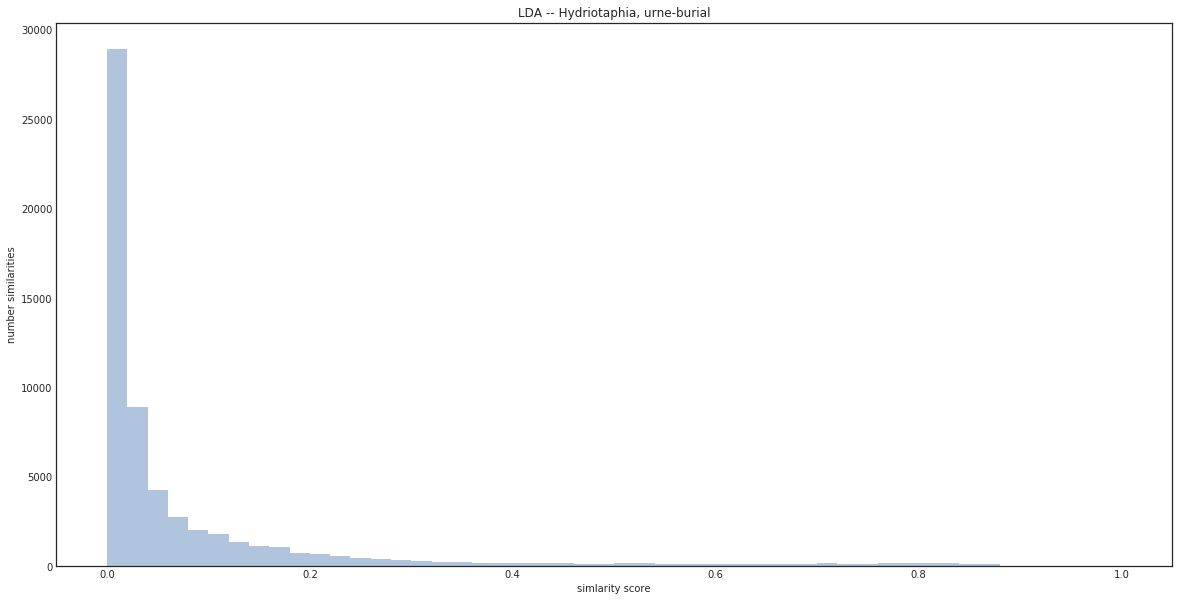

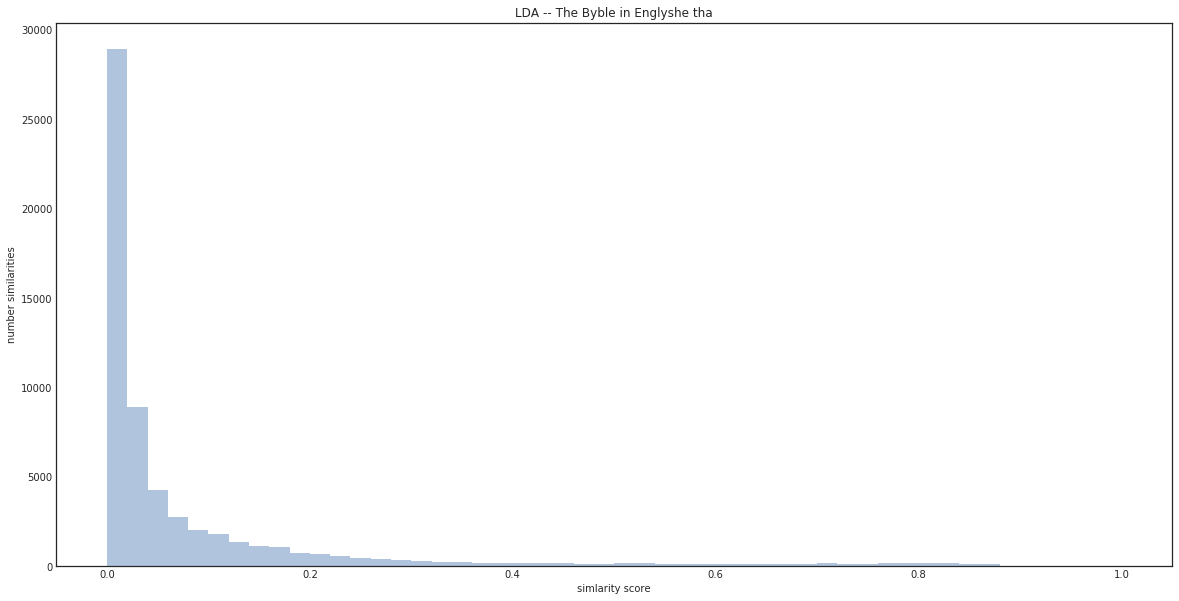

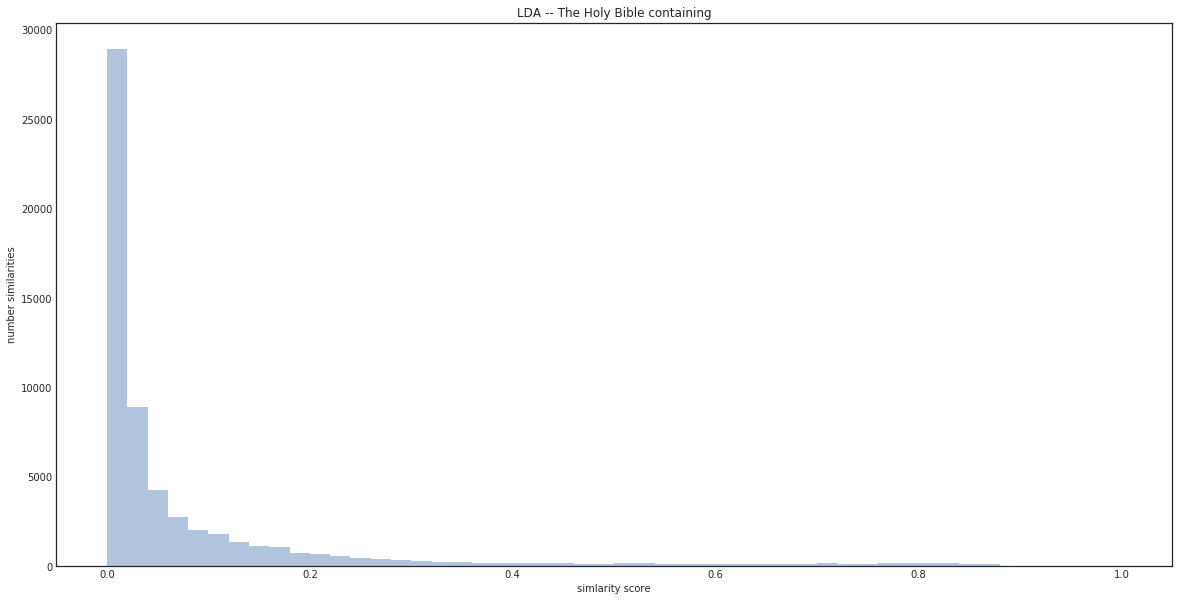

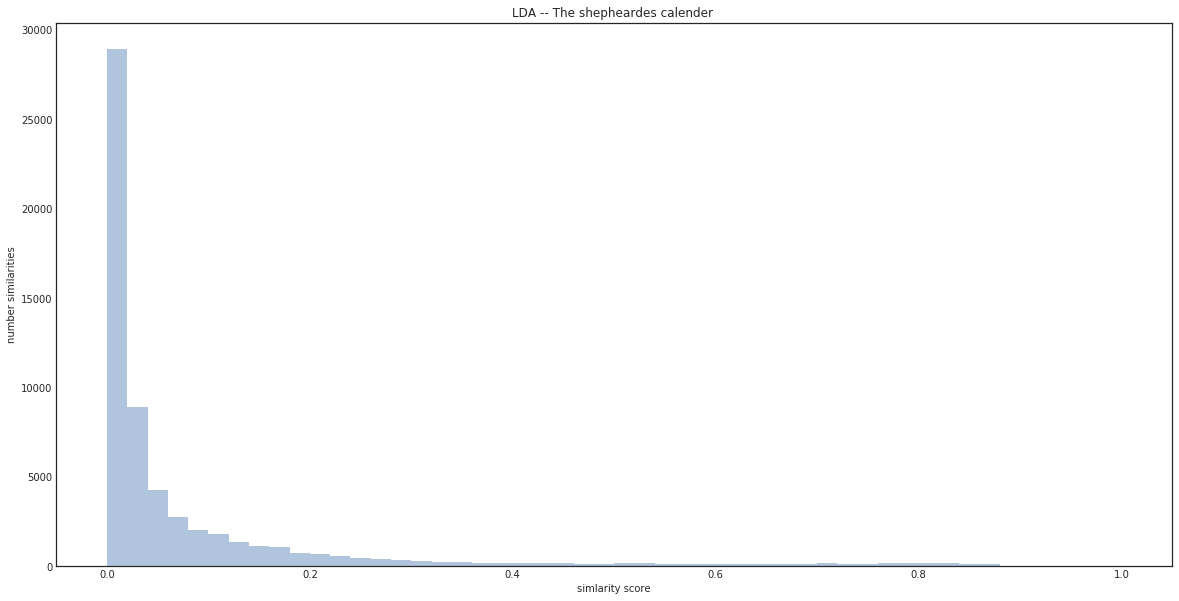

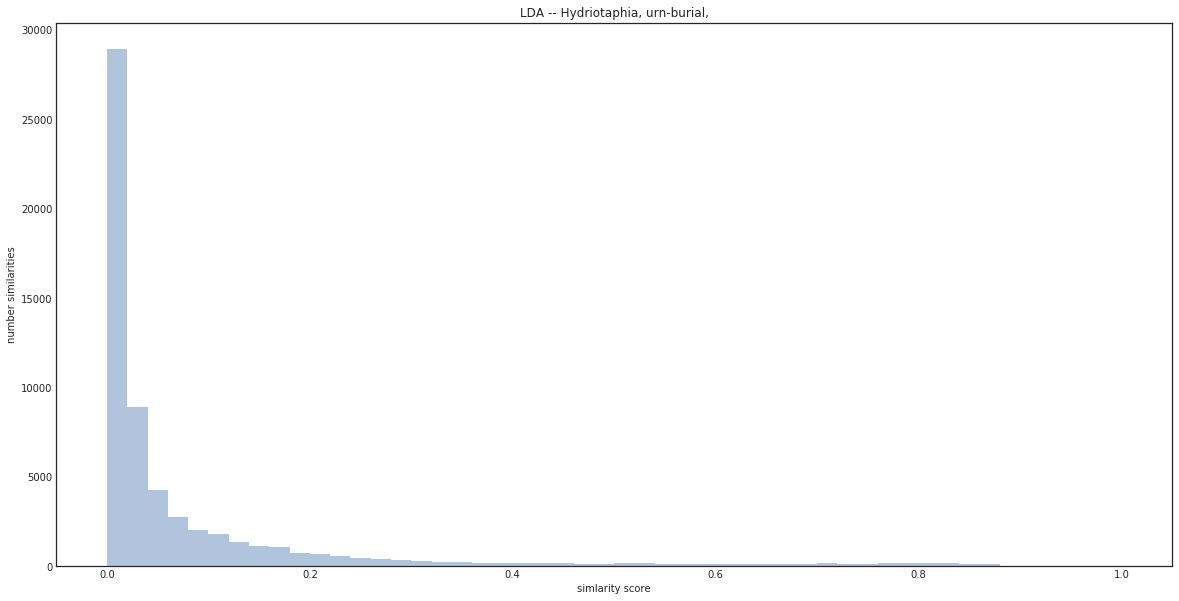

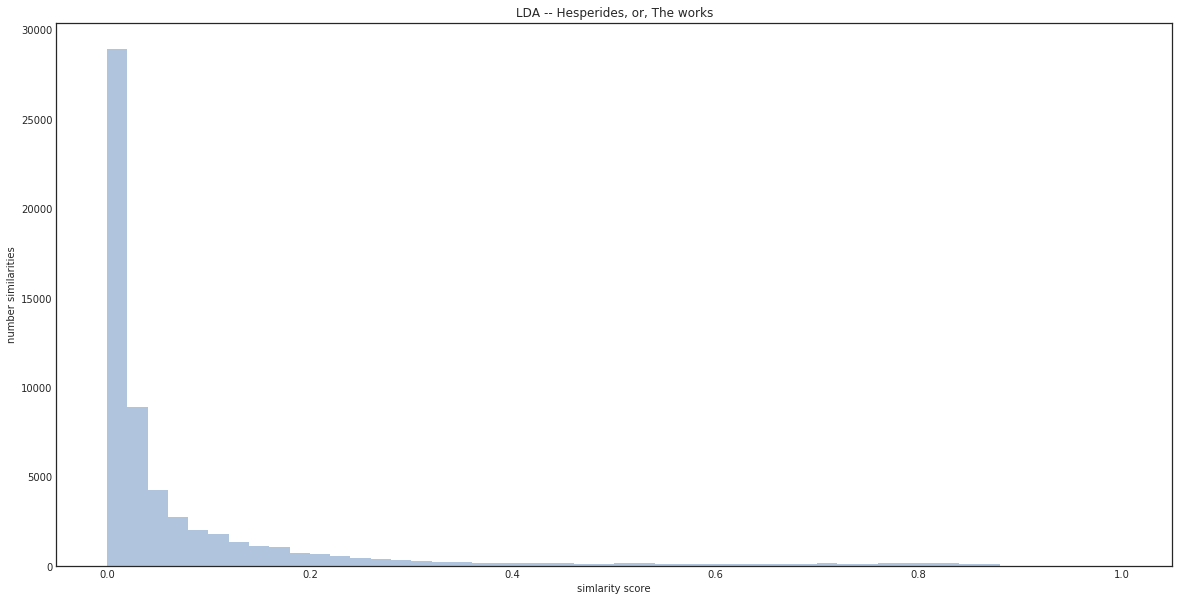

In [11]:
%matplotlib inline

import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

labels = load_labels_json()

for tcp_id in ['A17310', 'A77689', 'A10405', 'A97378', 'A12782', 'A29860', 'A43441']:
    
    m = metadata[tcp_id + '.xml']
    label_index = -1
    for a in range(0, len(labels)):
        if tcp_id + '.xml' == labels[a]:
            label_index = a
            break

    all_distances = []

    lda_for_a_file = corpus_lda[label_index]

    sims = index[lda_for_a_file]

    for s in sims:
        all_distances.append(s)

    sns.set_style("white")

    plt.figure(figsize=(20, 10))
    plt.title('LDA -- ' + m['title'][:25])
    plt.ylabel('number similarities')
    plt.xlabel('simlarity score')

    #ax = sns.distplot(all_distances)
    ax = plt.hist(all_distances, bins=50, color='lightsteelblue')
    
    plt.savefig('lda.' + tcp_id + '.png')
    
    plt.show()
    


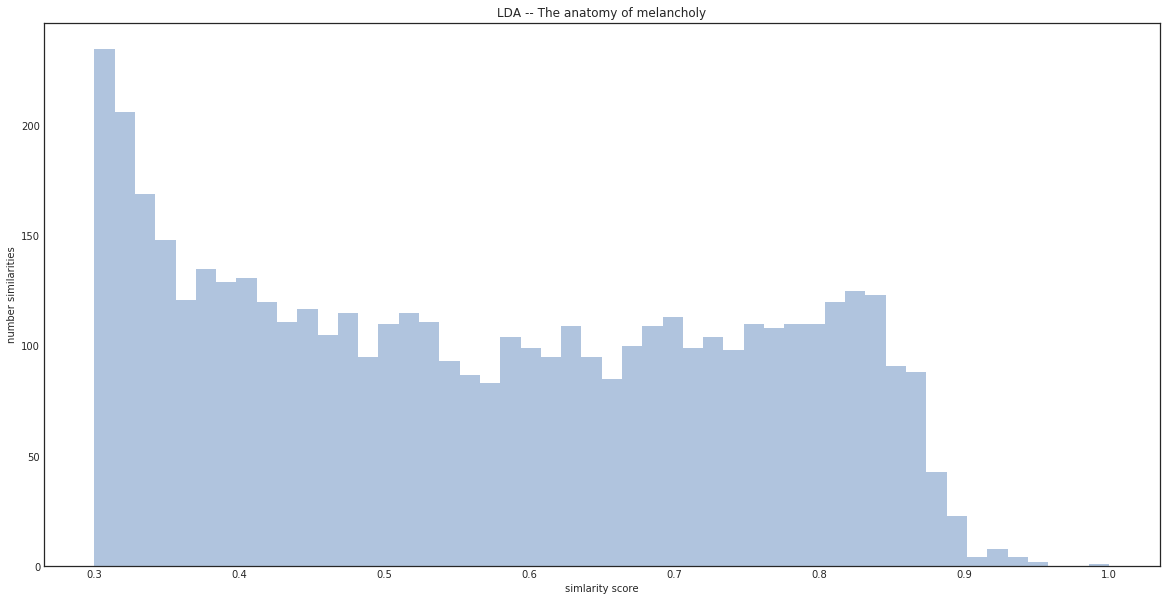

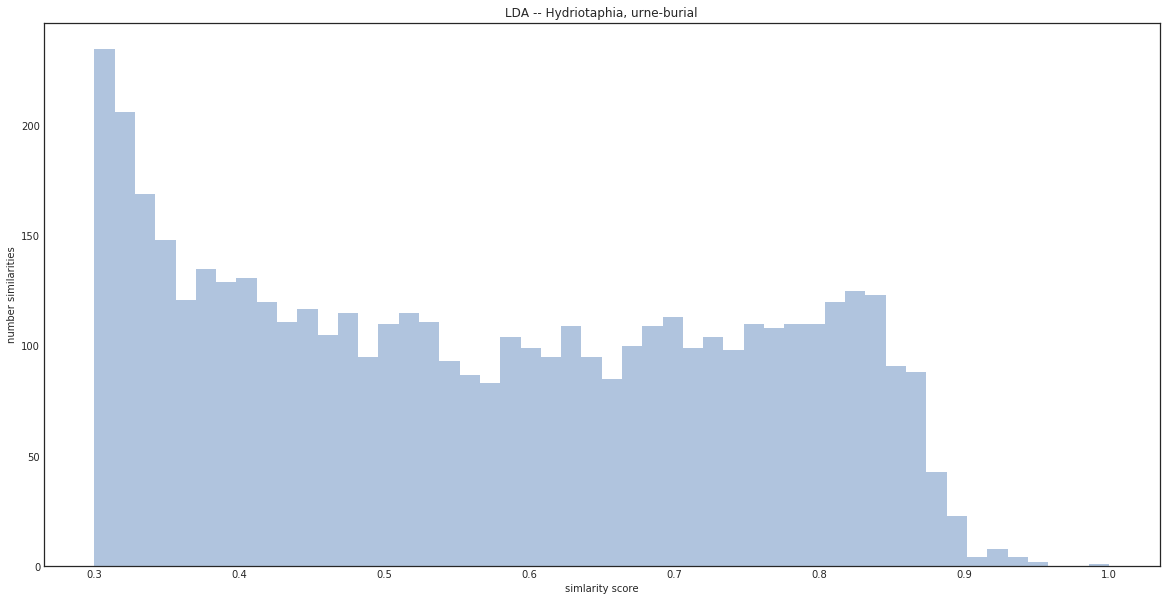

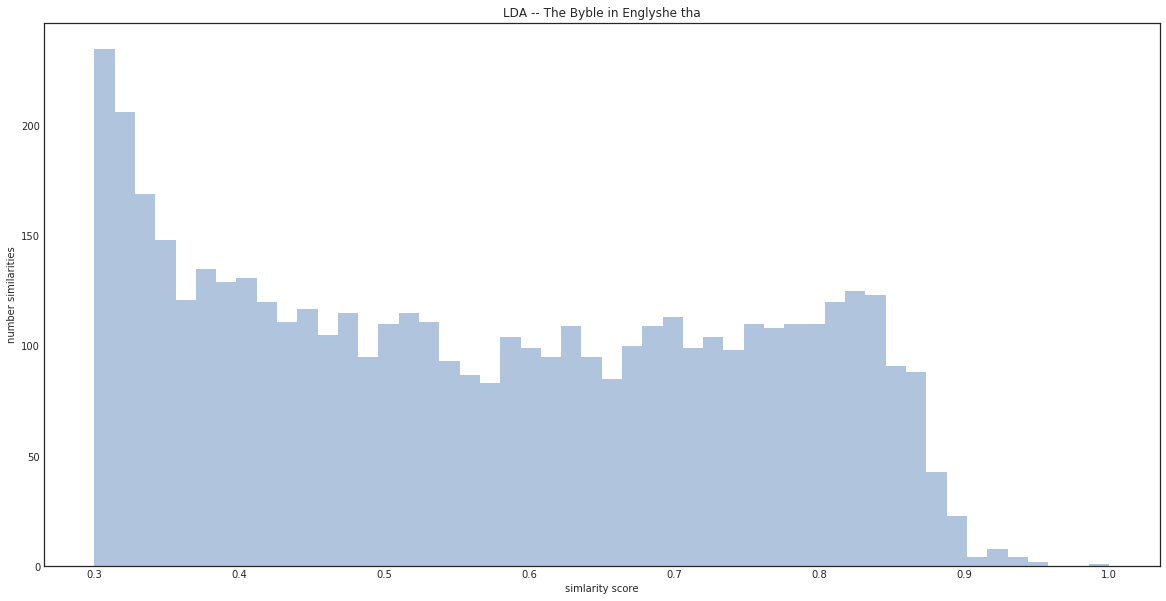

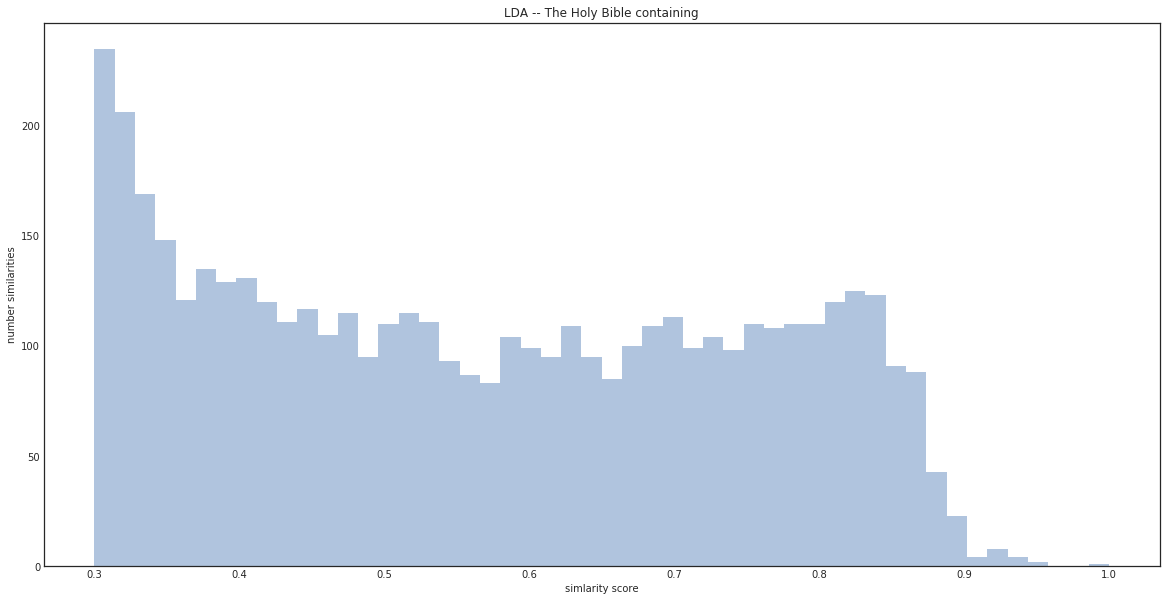

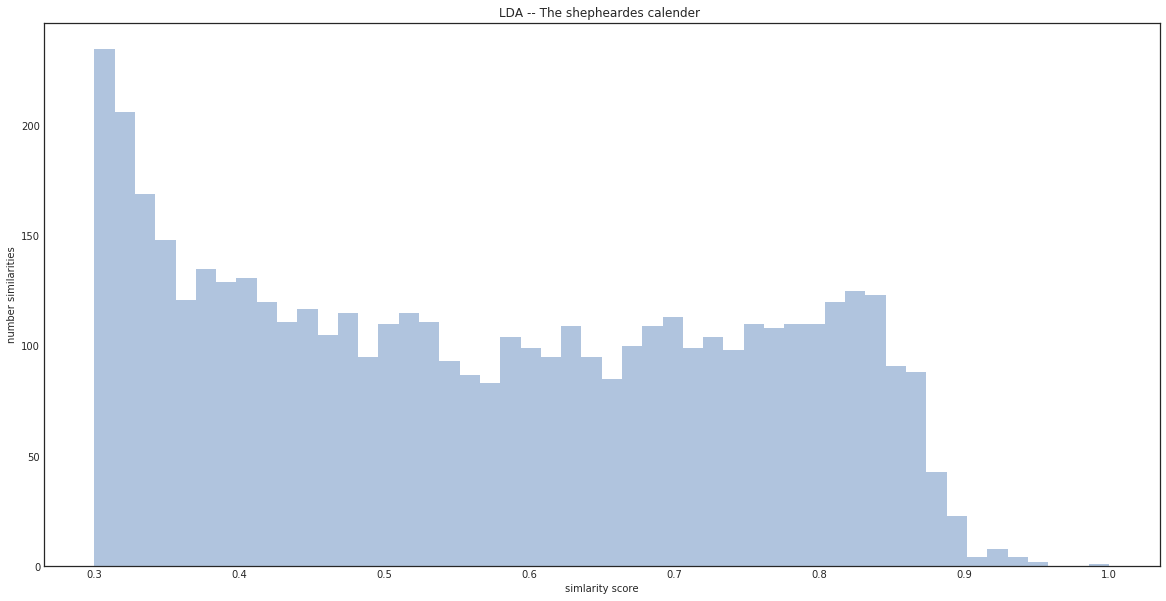

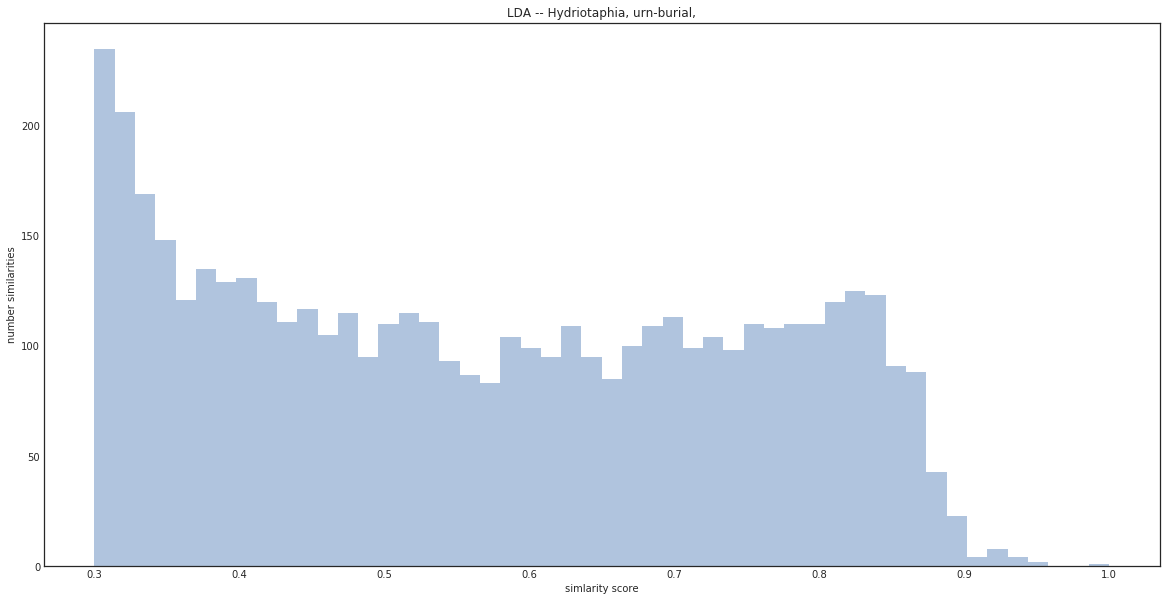

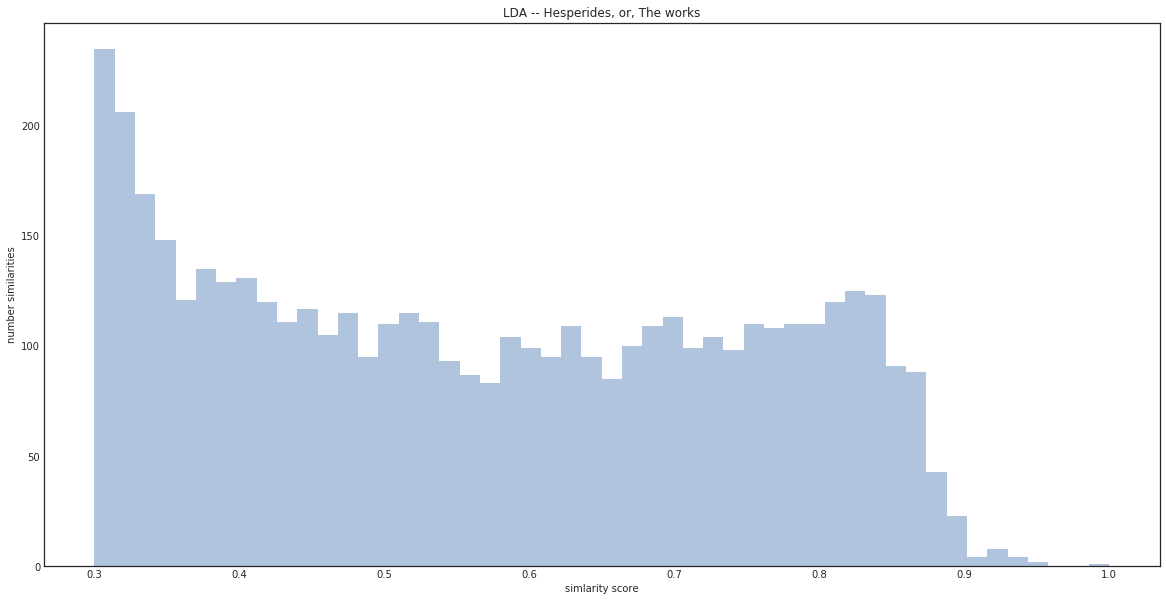

In [12]:
%matplotlib inline

import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

labels = load_labels_json()

for tcp_id in ['A17310', 'A77689', 'A10405', 'A97378', 'A12782', 'A29860', 'A43441']:
    
    m = metadata[tcp_id + '.xml']
    label_index = -1
    for a in range(0, len(labels)):
        if tcp_id + '.xml' == labels[a]:
            label_index = a
            break

    all_distances = []

    lda_for_a_file = corpus_lda[label_index]

    sims = index[lda_for_a_file]

    for s in sims:
        if s >= 0.3:
            all_distances.append(s)

    sns.set_style("white")

    plt.figure(figsize=(20, 10))
    plt.title('LDA -- ' + m['title'][:25])
    plt.ylabel('number similarities')
    plt.xlabel('simlarity score')

    #ax = sns.distplot(all_distances)
    ax = plt.hist(all_distances, bins=50, color='lightsteelblue')
    
    plt.savefig('lda.GE.0.3.' + tcp_id + '.png')
    
    plt.show()
    
